In [ ]:
from google.colab import files
import pandas as pd
import io

In [ ]:
uploaded = files.upload()

Saving CreditCardData_15000.csv to CreditCardData_15000.csv


Load the CSV into a dataframe

In [ ]:
df = pd.read_csv('CreditCardData_15000.csv')

In [ ]:
print(df.shape)
print(df.head())

(15000, 16)
  Transaction ID       Date Day of Week  Time Type of Card Entry Mode Amount  \
0      #2800 777  14-Oct-20   Wednesday    19         Visa        CVC    £21   
1      #3546 149  13-Oct-20     Tuesday     0         Visa        CVC     £6   
2      #3203 063  13-Oct-20     Tuesday     9   MasterCard        PIN     £7   
3      #2654 293  14-Oct-20   Wednesday    20         Visa        CVC    £17   
4      #3195 835  14-Oct-20   Wednesday    11         Visa        CVC    £27   

  Type of Transaction Merchant Group Country of Transaction Shipping Address  \
0              Online         Gaming         United Kingdom            China   
1              Online         Gaming                 Russia           Russia   
2                 ATM  Entertainment         United Kingdom   United Kingdom   
3              Online       Children         United Kingdom            China   
4              Online           Food         United Kingdom            India   

  Country of Residence Gen

In [ ]:
print("\nData types:")
print(df.dtypes)


Data types:
Transaction ID             object
Date                       object
Day of Week                object
Time                        int64
Type of Card               object
Entry Mode                 object
Amount                     object
Type of Transaction        object
Merchant Group             object
Country of Transaction     object
Shipping Address           object
Country of Residence       object
Gender                     object
Age                       float64
Bank                       object
Fraud                       int64
dtype: object


In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    3
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    1
Age                       0
Bank                      0
Fraud                     0
dtype: int64


Handle Missing Values

In [ ]:
# Check missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    3
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    1
Age                       0
Bank                      0
Fraud                     0
dtype: int64


In [ ]:
# Remove rows with missing Amount values (only 3 rows)
df = df.dropna(subset=['Amount'])

In [ ]:
# Fill missing gender value with mode (most frequent value)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64


In [ ]:
# Remove currency symbol (£) and convert to float
df['Amount'] = df['Amount'].str.replace('£', '').astype(float)

Amount column after conversion

In [ ]:
print(df['Amount'].head())

0    21.0
1     6.0
2     7.0
3    17.0
4    27.0
Name: Amount, dtype: float64


In [ ]:
print(f"Data type: {df['Amount'].dtype}")

Data type: float64


Drop Unnecessary Columns

In [ ]:
# Transaction ID is a unique identifier with no predictive value
df = df.drop('Transaction ID', axis=1)

In [ ]:
print("\nColumns after dropping Transaction ID:")
print(df.columns.tolist())


Columns after dropping Transaction ID:
['Date', 'Day of Week', 'Time', 'Type of Card', 'Entry Mode', 'Amount', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Gender', 'Age', 'Bank', 'Fraud']


In [ ]:
# Drop Date column since Day of Week already captures temporal patterns
df = df.drop('Date', axis=1)

In [ ]:
print(df.columns.tolist())

['Day of Week', 'Time', 'Type of Card', 'Entry Mode', 'Amount', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Gender', 'Age', 'Bank', 'Fraud']


Encode Binary Categorical Variables

In [ ]:
# Binary encoding for Gender (M=1, F=0)
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

In [ ]:
# Binary encoding for Type of Card
df['Type of Card'] = df['Type of Card'].map({'Visa': 1, 'MasterCard': 0})

In [ ]:
print(df[['Gender', 'Type of Card']].head())

   Gender  Type of Card
0       1             1
1       1             1
2       1             0
3       0             1
4       0             1


Label Encoding for Day of Week

In [ ]:
# Label encode Day of Week
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['Day of Week'] = df['Day of Week'].map(day_mapping)

In [ ]:
print(df['Day of Week'].value_counts().sort_index())

Day of Week
1    7516
2    7477
3       2
4       2
Name: count, dtype: int64


One-Hot Encoding for Nominal Variables

In [ ]:
# One-hot encode nominal categorical variables
categorical_cols = [
    'Entry Mode',
    'Type of Transaction',
    'Merchant Group',
    'Country of Transaction',
    'Shipping Address',
    'Country of Residence',
    'Bank'
]

print(f"\nShape before one-hot encoding: {df.shape}")


Shape before one-hot encoding: (14997, 14)


In [ ]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"Shape after one-hot encoding: {df_encoded.shape}")

Shape after one-hot encoding: (14997, 39)


In [ ]:
print(f"New columns created: {df_encoded.shape[1] - df.shape[1]}")

New columns created: 25


In [ ]:
print(df_encoded.shape[1])

39


Final Dataset

In [ ]:
# Check final dataset
print("\n" + "="*80)
print("Final Dataset Information:")
print("="*80)
print(f"Shape: {df_encoded.shape}")
print(f"\nColumn names:")
print(df_encoded.columns.tolist())


Final Dataset Information:
Shape: (14997, 39)

Column names:
['Day of Week', 'Time', 'Type of Card', 'Amount', 'Gender', 'Age', 'Fraud', 'Entry Mode_PIN', 'Entry Mode_Tap', 'Type of Transaction_Online', 'Type of Transaction_POS', 'Merchant Group_Electronics', 'Merchant Group_Entertainment', 'Merchant Group_Fashion', 'Merchant Group_Food', 'Merchant Group_Gaming', 'Merchant Group_Products', 'Merchant Group_Restaurant', 'Merchant Group_Services', 'Merchant Group_Subscription', 'Country of Transaction_India', 'Country of Transaction_Russia', 'Country of Transaction_USA', 'Country of Transaction_United Kingdom', 'Shipping Address_India', 'Shipping Address_Russia', 'Shipping Address_USA', 'Shipping Address_United Kingdom', 'Country of Residence_India', 'Country of Residence_Russia', 'Country of Residence_USA', 'Country of Residence_United Kingdom', 'Bank_Barlcays', 'Bank_HSBC', 'Bank_Halifax', 'Bank_Lloyds', 'Bank_Metro', 'Bank_Monzo', 'Bank_RBS']


In [ ]:
# Check data types
print(f"\nData types summary:")
print(df_encoded.dtypes.value_counts())


Data types summary:
bool       32
int64       5
float64     2
Name: count, dtype: int64


In [ ]:
# Check for missing values
print(f"\nMissing values: {df_encoded.isnull().sum().sum()}")


Missing values: 0


In [ ]:
# Check for any remaining non-numeric columns
non_numeric = df_encoded.select_dtypes(include=['object']).columns.tolist()
print(f"\nNon-numeric columns remaining: {non_numeric}")


Non-numeric columns remaining: []


In [ ]:
# Display first few rows
print("\nFirst 5 rows of encoded dataset:")
print(df_encoded.head())


First 5 rows of encoded dataset:
   Day of Week  Time  Type of Card  Amount  Gender   Age  Fraud  \
0            2    19             1    21.0       1  46.1      0   
1            1     0             1     6.0       1  52.0      1   
2            1     9             0     7.0       1  43.9      0   
3            2    20             1    17.0       0  31.5      1   
4            2    11             1    27.0       0  33.8      1   

   Entry Mode_PIN  Entry Mode_Tap  Type of Transaction_Online  ...  \
0           False           False                        True  ...   
1           False           False                        True  ...   
2            True           False                       False  ...   
3           False           False                        True  ...   
4           False           False                        True  ...   

   Country of Residence_Russia  Country of Residence_USA  \
0                        False                     False   
1                     

Check Class Balance


Target Variable Distribution:
Fraud
0    7805
1    7192
Name: count, dtype: int64

Fraud percentage: 47.96%


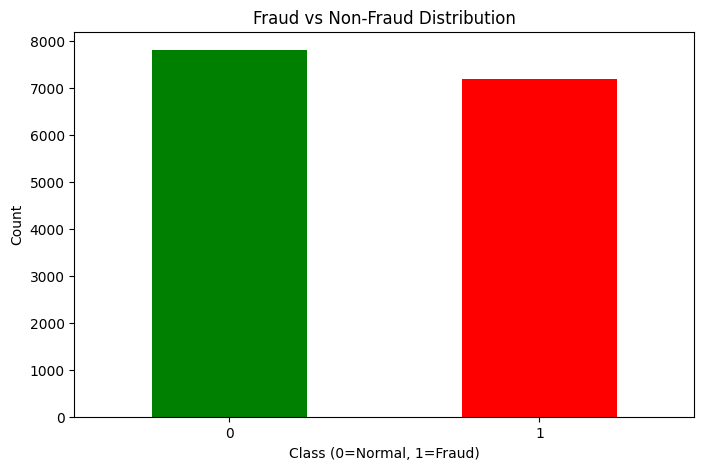

In [ ]:
# Check fraud distribution
print("\n" + "="*80)
print("Target Variable Distribution:")
print("="*80)
print(df_encoded['Fraud'].value_counts())
fraud_percentage = (df_encoded['Fraud'].sum() / len(df_encoded)) * 100
print(f"\nFraud percentage: {fraud_percentage:.2f}%")

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_encoded['Fraud'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Fraud vs Non-Fraud Distribution')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Save Cleaned Dataset

In [ ]:
# Save cleaned dataset
df_encoded.to_csv('CreditCardData_Cleaned.csv', index=False)
print("\n" + "="*80)
print("Dataset saved successfully!")
print("="*80)
print(f"File: CreditCardData_Cleaned.csv")
print(f"Shape: {df_encoded.shape}")



Dataset saved successfully!
File: CreditCardData_Cleaned.csv
Shape: (14997, 39)
